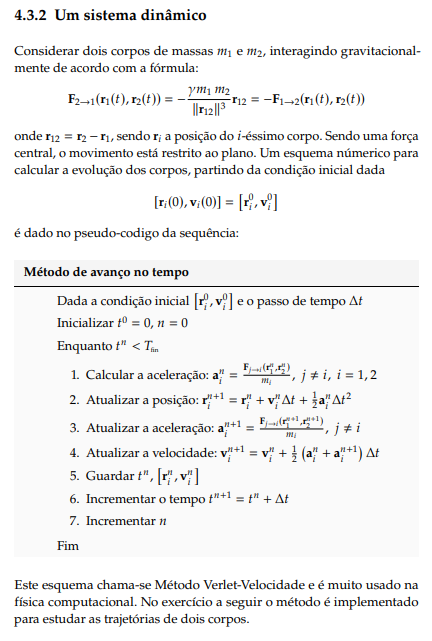

In [166]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [167]:
def iteracao(S1, S2, P, delta_t):
    #S = [[x, y], [x_dot, y_dot]]
    r1, v1 = S1
    r2, v2 = S2

    # P = [gamma, m1, m2]
    gamma, m1, m2 = P

    #calcula acelerações pela segunda lei de newton
    a1 = gamma*m1*m2 * (r2-r1)/np.linalg.norm(r2-r1)
    a2 = -a1 #terceira lei de newton

    r1_new = r1 + v1*delta_t + (1/2)*a1*delta_t**2
    r2_new = r2 + v2*delta_t + (1/2)*a2*delta_t**2

    a1_new = gamma*m1*m2 * (r2_new - r1_new)/np.linalg.norm(r2_new-r1_new)
    a2_new = -a1_new

    v1_new = v1 + (1/2)*(a1 + a1_new)*delta_t
    v2_new = v2 + (1/2)*(a2 + a2_new)*delta_t

    S1_new = np.array([r1_new, v1_new])
    S2_new = np.array([r2_new, v2_new])

    return S1_new, S2_new



In [168]:
def solver(S1, S2, P, tf = 10, delta_t = 0.01):
    t = np.arange(0, tf, delta_t)
    i_max = len(t)
    i = 1

    #define os arrays que salvam posição e velocidade em função do tempo
    S1_array = np.zeros(shape=(i_max, 2,2))
    S2_array = np.zeros(shape=(i_max, 2, 2))

    #coloca as condições iniciais
    S1_array[0] = S1
    S2_array[0] = S2

    #realiza as iterações até que o tempo máximo seja atingido
    while i < i_max:
        S1_new, S2_new = iteracao(S1_array[i-1], S2_array[i-1], P, delta_t)
        S1_array[i] = S1_new
        S2_array[i] = S2_new
        i += 1

    solution = t, S1_array, S2_array #salva tudo em um único array
    save(solution)

    return 0

def save(solution):
    t, S1_array, S2_array = solution #descompacta a tupla
    
    #acertar os resultados da forma certa
    r1, v1 = S1_array.T
    r2, v2 = S2_array.T

    x1, y1 = r1
    x2, y2 = r2
    x1_dot, y1_dot = v1
    x2_dot, y2_dot = v2

    sol = t, x1, y1, x1_dot, y1_dot, x2, y2, x2_dot, y2_dot #juntar tudo
    np.savetxt("solucao.txt", sol ) #salva o arquivo


In [169]:

def reader(filename, P, ani = False):
    t, x1, y1, x1_dot, y1_dot, x2, y2, x2_dot, y2_dot = np.loadtxt(filename) #carrega os arquivos
    gamma, m1, m2 = P

    #faz o plot da trajetória
    plt.clf()
    plt.plot(x1,y1, label = "1")
    plt.plot(x2,y2, label = "2")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Trajetória")
    plt.legend()
    plt.savefig("trajetoria.png")

    plt.clf()

    #faz o plot da energia cinetica
    K = m1*(x1_dot**2 + y1_dot**2)/2 + m2*(x2_dot**2 + y2_dot**2)/2
    U = -gamma*m1*m2/np.sqrt((x2 -x1)**2 + (y2-y1)**2)
    E = U + K

    plt.plot(t,K, label = "Cinética")
    plt.plot(t,U, label = "Potencial")
    plt.plot(t,E, label = "Total")

    plt.xlabel("t")
    plt.ylabel("Energia")
    plt.title("Energias por Tempo")
    plt.legend()
    plt.savefig("energias.png")
    plt.clf()

    if ani:
        #faz e salva animação da trajetória
        animate = lambda i: ln1.set_data([x1[i], x2[i]], [y1[i], y2[i]])
        fig, ax = plt.subplots(1,1, figsize=(8,8))
        ax.grid()

        ln1, = plt.plot([], [], 'ro', lw=3, markersize=6)
        ax.set_ylim(-2, 2)
        ax.set_xlim(-2,2)
        ani = animation.FuncAnimation(fig, animate, frames=len(t))
        ani.save('plan.gif',writer='pillow')

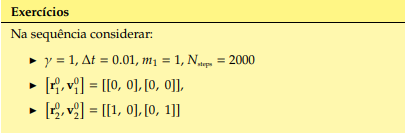

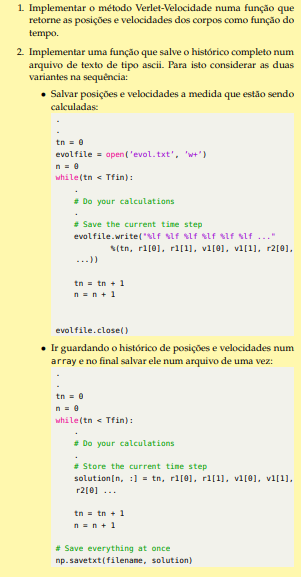

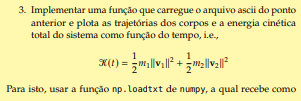
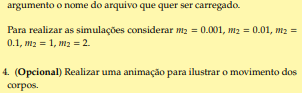

In [170]:
P = (1,1,1)
S1 = np.array([[0,0], [0,0]])
S2 = np.array([[1,0], [0,1]])

solver(S1, S2, P)
reader("solucao.txt", P)


<Figure size 640x480 with 0 Axes>